# Part a) Quantum Computing Basics

## Introduction

Quantum computers in contrast to classical computers offers another way to process information.
Quantum computing is based on the principles of quantum mechanics, which govern the behavior of subatomic particles.
Classical computing utilizes bits, which exist exclusively as either 0 or 1. Quantum computing, however, relies on quantum bits or qubits, capable of existing in a superposition, meaning they can represent both 0 and 1 simultaneously. This unique property enables quantum computers to perform certain computations significantly faster than classical systems.

In this part of the project, we will explore the fundamental concepts of quantum computing, including qubits, superposition, entanglement, and quantum gates. We have implemented a custom quantum computing simulator that includes
implementations of qubits, quantum gates, quantum circuits, and measurement.
In parallel, we will also be using Qiskit a Python library for quantum computing, to implement the same concepts, to compare our custom results with Qiskit results.
Custom implementation helped us in understanding the underlying concepts of quantum computing and in parallell we are using qiskit to learn it's syntax and usage because in the future it is recommended and we will be using external libraries for quantum computing, since they are optimized and include many features.


In [ ]:
from quantum_computing.p1.quantum import states, gates, measurements, utils

### Quantum Computational basis

In quantum computing, the computational basis refers to a set of basis states that can be used to represent quantum information. The most common computational basis for a single qubit consists of two states, denoted as $\ket{0}$ and $\ket{1}$. These states are represented as vectors in a two-dimensional complex vector space, which is the Hilbert space for a single qubit.

$$
\ket{0} = \begin{bmatrix}
1 \\
0
\end{bmatrix}, \quad
\ket{1} = \begin{bmatrix}
0 \\
1
\end{bmatrix}, \quad
$$

We start by defining two seperate qbits, one in the state $\ket{0}$ and the other in the state $\ket{1}$.


In [ ]:
ket0 = states.Qubit.ket_0()
ket1 = states.Qubit.ket_1()

utils.print_state(ket0.vector, "|0⟩")
utils.print_state(ket1.vector, "|1⟩")

|0⟩ = [1.+0.j 0.+0.j] --> [1 0]ᵀ
|1⟩ = [0.+0.j 1.+0.j] --> [0 1]ᵀ


##### Apply Pauli gates

The Pauli gates are a set of single-qubit quantum gates that are used to manipulate the state of qubits.
There are three Pauli gates: the Pauli-X gate (also known as the NOT gate), the Pauli-Y gate, and the Pauli-Z gate. These gates are represented by the following matrices:

$$
X = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}, \quad
Y = \begin{bmatrix}
0 & -i \\
-i & 0
\end{bmatrix}, \quad
Z = \begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$

Bellow we will apply the three Pauli gates to the qubit in the state $\ket{0}$ and $\ket{1}$, and observe the results.
As an example Pauli-X on $\ket{0}$

$$
X \ket{0} = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix} \begin{bmatrix}
1 \\
0
\end{bmatrix} = \begin{bmatrix}
0 \\
1
\end{bmatrix} = \ket{1}
$$


In [ ]:
X = gates.PauliX()
Y = gates.PauliY()
Z = gates.PauliZ()

# Apply X gate to ket0
XKet0 = X.apply(ket0.vector)
YKet0 = Y.apply(ket0.vector)
ZKet0 = Z.apply(ket0.vector)

XKet1 = X.apply(ket1.vector)
YKet1 = Y.apply(ket1.vector)
ZKet1 = Z.apply(ket1.vector)

utils.print_state(XKet0, "X|0⟩")
utils.print_state(YKet0, "Y|0⟩")
utils.print_state(ZKet0, "Z|0⟩")
utils.print_state(XKet1, "X|1⟩")
utils.print_state(YKet1, "Y|1⟩")
utils.print_state(ZKet1, "Z|1⟩")
print("\n")

# Using Qiskit
from qiskit.quantum_info import Statevector, Operator

ket0_qiskit = Statevector.from_label("0")
ket1_qiskit = Statevector.from_label("1")

X_qiskit = Operator.from_label("X")
Y_qiskit = Operator.from_label("Y")
Z_qiskit = Operator.from_label("Z")

XKet0_qiskit = ket0_qiskit.evolve(X_qiskit)
YKet0_qiskit = ket0_qiskit.evolve(Y_qiskit)
ZKet0_qiskit = ket0_qiskit.evolve(Z_qiskit)
XKet1_qiskit = ket1_qiskit.evolve(X_qiskit)
YKet1_qiskit = ket1_qiskit.evolve(Y_qiskit)
ZKet1_qiskit = ket1_qiskit.evolve(Z_qiskit)
print("Using Qiskit:")
utils.print_state(XKet0_qiskit.data, "X|0⟩")
utils.print_state(YKet0_qiskit.data, "Y|0⟩")
utils.print_state(ZKet0_qiskit.data, "Z|0⟩")
utils.print_state(XKet1_qiskit.data, "X|1⟩")
utils.print_state(YKet1_qiskit.data, "Y|1⟩")
utils.print_state(ZKet1_qiskit.data, "Z|1⟩")
print("\n")

X|0⟩ = [0.+0.j 1.+0.j] --> [0 1]ᵀ
Y|0⟩ = [0.+0.j 0.+1.j] --> [0 1.0000i]ᵀ
Z|0⟩ = [1.+0.j 0.+0.j] --> [1 0]ᵀ
X|1⟩ = [1.+0.j 0.+0.j] --> [1 0]ᵀ
Y|1⟩ = [0.-1.j 0.+0.j] --> [-1.0000i 0]ᵀ
Z|1⟩ = [ 0.+0.j -1.+0.j] --> [0 -1]ᵀ


Using Qiskit:
X|0⟩ = [0.+0.j 1.+0.j] --> [0 1]ᵀ
Y|0⟩ = [0.+0.j 0.+1.j] --> [0 1.0000i]ᵀ
Z|0⟩ = [1.+0.j 0.+0.j] --> [1 0]ᵀ
X|1⟩ = [1.+0.j 0.+0.j] --> [1 0]ᵀ
Y|1⟩ = [0.-1.j 0.+0.j] --> [-1.0000i 0]ᵀ
Z|1⟩ = [ 0.+0.j -1.+0.j] --> [0 -1]ᵀ




After applying the pauli gates we observe that the Pauli-X gate flips the state of the qubit, while the Pauli-Y and Pauli-Z gates introduce phase shifts.
The Pauli-Y gate flips the bit with a phase of 90 degrees and the Pauli-Z gate introduces a phase shift of $\pi$ (180 degrees) to the state of the qubit.

Using Qiskit, we get the same results utilizing the qiskit library's 'Statevector' and 'Operator' classes which represent quantum states and operators, respectively. and then use evolve method that changes the state of the qubit according to the operator(gate) applied to it.


#### Apply Hadamard gate

Next we will apply the Hadamard gate to the qubit in the state $\ket{0}$ and $\ket{1}$. The Hadamard gate is a single-qubit gate that creates superposition states. It is represented by the following matrix:

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$


In [ ]:
H = gates.Hadamard()
HKet0 = H.apply(ket0.vector)
HKet1 = H.apply(ket1.vector)

utils.print_state(HKet0, "H|0⟩")
utils.print_state(HKet1, "H|1⟩")

# Using Qiskit
H_qiskit = Operator.from_label("H")
HKet0_qiskit = ket0_qiskit.evolve(H_qiskit)
HKet1_qiskit = ket1_qiskit.evolve(H_qiskit)
print("Using Qiskit:")
utils.print_state(HKet0_qiskit.data, "H|0⟩")
utils.print_state(HKet1_qiskit.data, "H|1⟩")
print("\n")

H|0⟩ = [0.70710678+0.j 0.70710678+0.j] --> [0.7071 0.7071]ᵀ
H|1⟩ = [ 0.70710678+0.j -0.70710678+0.j] --> [0.7071 -0.7071]ᵀ
Using Qiskit:
H|0⟩ = [0.70710678+0.j 0.70710678+0.j] --> [0.7071 0.7071]ᵀ
H|1⟩ = [ 0.70710678+0.j -0.70710678+0.j] --> [0.7071 -0.7071]ᵀ




Applying the Hadamard gate to the qubits in the state $\ket{0}$ and $\ket{1}$, we see that both
states are transformed into superposition states, that is the qbit exists in both states $\ket{0}$ and $\ket{1}$ at the same time. We notice the value of the amplitudes of the states are equal and is $\frac{1}{\sqrt{2}}$.
This values of the amplitudes represent the probability of measuring the qubit in either state. And is
calculated as the square of the amplitude which gives 50\% chance of measuring the qubit in either state.

$$
\begin{bmatrix}
\frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}}
\end{bmatrix} \rightarrow P(\ket{0}) = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}, \quad P(\ket{1}) = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}
$$


#### Apply Phase gate

The Phase gate is a single-qubit gate that introduces a phase shift to the state of the qubit. It is represented by the following matrix:

$$
S = \begin{bmatrix}
1 & 0 \\
0 & i
\end{bmatrix}
$$


In [ ]:
S = gates.Phase()

SKet0 = S.apply(ket0.vector)
SKet1 = S.apply(ket1.vector)

utils.print_state(SKet0, "S|0⟩")
utils.print_state(SKet1, "S|1⟩")
print("\n")

S_qiskit = Operator.from_label("S")
SKet0_qiskit = ket0_qiskit.evolve(S_qiskit)
SKet1_qiskit = ket1_qiskit.evolve(S_qiskit)

print("Using Qiskit:")
utils.print_state(SKet0_qiskit.data, "S|0⟩")
utils.print_state(SKet1_qiskit.data, "S|1⟩")
print("\n")

S|0⟩ = [1.+0.j 0.+0.j] --> [1 0]ᵀ
S|1⟩ = [0.+0.j 0.+1.j] --> [0 1.0000i]ᵀ


Using Qiskit:
S|0⟩ = [1.+0.j 0.+0.j] --> [1 0]ᵀ
S|1⟩ = [0.+0.j 0.+1.j] --> [0 1.0000i]ᵀ




We see that the Phase gate introduces a phase shift of $\frac{\pi}{2}$ (90 degrees) to the state of the qubit.
The second element of the state vector is multiplied by the imaginary unit $i$, which represents a phase shift of 90 degrees.


## Multiple Qubits

In quantum computing, multiple qubits can be combined to create more complex quantum states. The state of a multi-qubit system is represented as a tensor product of the individual qubit states. For example, the state of two qubits can be represented as:

$$
\ket{00} =  \ket{0}\otimes\ket{0} = \begin{bmatrix}
1 \\
0 \\
0 \\
0
\end{bmatrix}, \quad


\ket{11} =  \ket{1}\otimes\ket{1} = \begin{bmatrix}
0 \\
0 \\
0 \\
1
\end{bmatrix}, \quad
$$

Next we will create an entangled two-qubit state namely the Bell state.


#### Prepare the Bell state $\ket{\Phi^+}$

Bell states are a specific type of entangled quantum state that involve two qubits. They are maximally entangled states, meaning that the measurement of one qubit instantaneously determines the state of the other qubit, regardless of the distance between them. The four Bell states are:

1. $\ket{\Phi^+} = \frac{1}{\sqrt{2}} \left( \ket{00} + \ket{11} \right)$
2. $\ket{\Phi^-} = \frac{1}{\sqrt{2}} \left( \ket{00} - \ket{11} \right)$
3. $\ket{\Psi^+} = \frac{1}{\sqrt{2}} \left( \ket{01} + \ket{10} \right)$
4. $\ket{\Psi^-} = \frac{1}{\sqrt{2}} \left( \ket{01} - \ket{10} \right)$

In our example we will prepare the Bell state $\ket{\Phi^+}$ using a combination of Hadamard and CNOT gates with an initial state of $\ket{00}$.

Step 1: Apply Hadamard gate to the first qubit

$$
H \ket{0} = \frac{1}{\sqrt{2}} \left( \ket{0} + \ket{1} \right)
$$

Step 2: Apply CNOT gate with control qubit is $\ket{0}$ and target qubit is $\ket{1}$

$$
CX = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$

The CNOT gate flips the target qubit if the control qubit is in state $\ket{1}$.
The table below shows the effect of the CNOT gate on the two-qubit states with control qubit being the first qubit.
|Before CNOT|After CNOT|
|---|---|
|$\ket{00}$|$\ket{00}$|
|$\ket{01}$|$\ket{01}$|
|$\ket{10}$|$\ket{11}$|
|$\ket{11}$|$\ket{10}$|

Totall: $$\ket{\Phi^+} = \textbf{CX}(\textbf{H}\ket{0}\otimes\ket{0}) \tag{1}$$

We do the tensor product to combine the two qubits into a single state vector.


In [ ]:
from quantum_computing.p1.quantum.circuits import QuantumCircuit
from quantum_computing.p1.quantum.states import TwoQubits

CX = gates.CNOT()

qc = QuantumCircuit(2)

qc.initialize(TwoQubits.ket_00())
qc.add_gate(H, 0)
qc.add_gate(CX, 1, 0)

final_state = qc.simulate()
bell_state = final_state
utils.print_state(final_state, "CNOT|+0⟩ = Bell state |Φ+⟩")

# Also create Bell state using Qiskit
from qiskit import QuantumCircuit as QiskitCircuit
from qiskit.quantum_info import Statevector

qc_qiskit = QiskitCircuit(2)
qc_qiskit.h(0)
qc_qiskit.cx(0, 1)

bell_qiskit = Statevector.from_instruction(qc_qiskit)

print("Using Qiskit:")
utils.print_state(bell_qiskit.data, "CNOT|+0⟩ = Bell state |Φ+⟩")
qc_qiskit.draw()

CNOT|+0⟩ = Bell state |Φ+⟩ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j] --> [0.7071 0 0 0.7071]ᵀ
Using Qiskit:
CNOT|+0⟩ = Bell state |Φ+⟩ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j] --> [0.7071 0 0 0.7071]ᵀ


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

The code above demonstrates the preparation of the Bell state $\ket{\Phi^+}$ by creating a quantum circuit with two qubits and applying first the hadamard gate to the first qubit (qbit 0) and then the CNOT gate with the first qubit as the control qubit and the second qubit (qbit 1) as the target qubit. The resulting state $[0.7071, 0 ,0, 0.7071]ᵀ$ is a superposition of $\ket{00}$ and $\ket{11}$, which is the Bell state $\ket{\Phi^+}$.
with the probability of measuring the qubits in either state being 50\%.

Using Qiskit, we get the same result by follwing the same steps. Qiskit also provides a method to draw and visualize the quantum circuit, from the figure above we see the a the quantum circuit with two qubits.
The flow of the circuit from left to right. We see Hadamard gate ($\textbf{H}$) applied to the first qubit ($q_1$) and then the CNOT ($\textbf{X}$) gate applied to the second qubit ($q_2$) with the first qubit as the control.

In our custom implementation when doing the different gate operations we have used the appraoch of expanded matrix
multiplication to get the final state of the qubits. This is to make it be more general and since we are working with small qbits there is no practical difference in performance.

The expanded matrix multiplication involves preparing a complete matrix that represents the combined state of all qubits and then applying the gate operation to the entire matrix. Forexample in our case in contrast to Eq(1) in our implementation since we start with the state $\ket{00}$ we have to expand the Hadamard gate to be a 4x4 matrix and then apply the CNOT gate to the entire matrix.
And it is done by tensor product of the Hadamard gate with the identity matrix of size 2x2. $\textbf{H}\otimes\textbf{I}$. In contrast if we want to apply the Hadamard gate to the second qubit we would have to do $\textbf{I}\otimes\textbf{H}$.


### Measurement on two-qbit system

To build a simulation for measurement of a quantum system we are using probability amplitudes of the quantum state and use probability distribution based on the amplitudes to measure the state of the qubit.

In real quantum computers, measurement is a process that collapses the quantum state into one of the basis states with a certain probability. The measurement process is probabilistic, meaning that the outcome of the measurement is probabilisticly deteministic in contrast to classical measurement which is deterministic.

We will simulate the measurement process by first doing a mesurement on the first qubit and then the second qubit one time.
and then do an experiment of 200 measurements on the two qubits and observe the results.


In [ ]:
measurement_experiment = measurements.QuantumMeasurement()
on_first_qubit = measurement_experiment.measure_qubit(bell_state, 0, 2)
on_second_qubit = measurement_experiment.measure_qubit(bell_state, 1, 2)

print("Measurement on first qubit:")
utils.print_state(on_first_qubit[1], f"Result: ({on_first_qubit[0]})")
print("Measurement on second qubit:")
utils.print_state(on_second_qubit[1], f"Result: ({on_second_qubit[0]})")

Measurement on first qubit:
Result: (0) = [1.+0.j 0.+0.j 0.+0.j 0.+0.j] --> [1 0 0 0]ᵀ
Measurement on second qubit:
Result: (1) = [0.+0.j 0.+0.j 0.+0.j 1.+0.j] --> [0 0 0 1]ᵀ


Results of measuring qbit 0 and qbit 1 one time shows that either qbit can be in state $(0)$ or $(1)$ being $\ket{0}$ or $\ket{1}$ respectively.
The results of the measurement are probabilistic, and we can run the same notebook multiple times to get different results for the two qbits.


###


In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

qc_qiskit = QiskitCircuit(2, 2)
qc_qiskit.h(0)
qc_qiskit.cx(0, 1)
qc_qiskit.measure(0, 0)
qc_qiskit.measure(1, 1)

simulator = AerSimulator()

transpiled_qc = transpile(qc_qiskit, simulator)
results = simulator.run(transpiled_qc, shots=2).result()
counts = results.get_counts(transpiled_qc)
qc_qiskit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

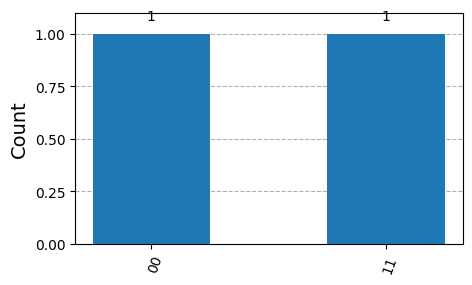

In [ ]:
plot_histogram(counts, figsize=(5, 3))

#### Multiple measurement experiment


Measurement on all qubits:
Counter({'11': 107, '00': 93})


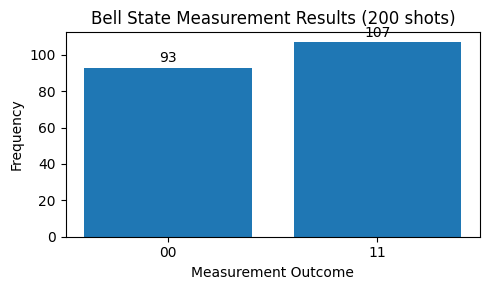

In [ ]:
exp_results = measurement_experiment.measure_all(bell_state, 200)
print("Measurement on all qubits:")
print(exp_results)

fig, ax = plt.subplots(figsize=(5, 3))

keys = list(exp_results.keys())
values = list(exp_results.values())

ax.bar(keys, values)
ax.set_title("Bell State Measurement Results (200 shots)")
ax.set_xlabel("Measurement Outcome")
ax.set_ylabel("Frequency")

for i, v in enumerate(values):
    ax.text(i, v + 3, str(v), ha="center")

plt.tight_layout()
plt.show()

#### Qiskit multiple measurement


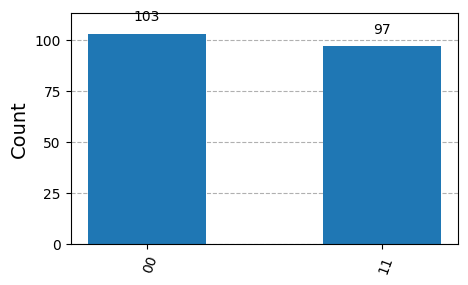

In [ ]:
results = simulator.run(transpiled_qc, shots=200).result()
counts = results.get_counts(transpiled_qc)
plot_histogram(counts, figsize=(5, 3))

The result of running the an experiment using Qiskit circuit simulator similar results to our custom implementation.